In [1]:
# importing dependencies

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# import openweather API key
from Config import weather_api_key

# after installing "pip install citypy", then this module would work. 
from citipy import citipy

In [ ]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [ ]:
# creating an empty list for holding  Random lat_lngs and cities
Random_lat_lngs = []
cities = []

# Create a set of random lat and lng combinations, then zip (putting them in pair, lat first then long)
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
Random_lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination (using the citypy module)
for lat_lng in Random_lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

In [ ]:
# creating empty lists so we can put values from the api calls
latitute = []
longitude = []
MaxTemp =[]
Humidity = []
Cloudiness = []
WindSpeed = []
Country =[]
Date =[]
CityName=[]

In [ ]:
url = "http://api.openweathermap.org/data/2.5/weather?"
# full url    full_url = url + "appid=" + weather_api_key + "&q=" + cities[0] + "&units=imperial"
# Build query URL, 
counter = 0
for x in cities:
    full_url = url + "appid=" + weather_api_key + "&q=" + x + "&units=imperial"
    response = requests.get(full_url).json()
    try:
        longitude.append(response["coord"]["lon"])
        latitute.append(response["coord"]["lat"])
        MaxTemp.append(response["main"]["temp_max"])
        Humidity.append(response["main"]["humidity"])
        Cloudiness.append(response["clouds"]["all"])
        WindSpeed.append(response["wind"]["speed"])
        Country.append(response["sys"]["country"])
        Date.append(response["dt"])
        CityName.append(response["name"])
        counter = counter + 1
        #y = x.str.title
        print(f"Data for {x} city successfully retrieved. Record #{counter}")
        
        time.sleep(1)
    except:
          print("An exception occurred")


In [ ]:
# putting the lists into a dataframe
City_Weather_DF = pd.DataFrame({"City":CityName,
                               "Latitute":latitute,
                                "Longitude":longitude,
                                "Max Temp":MaxTemp,
                               "Humidity":Humidity,
                               "Cloudiness":Cloudiness,
                               "Wind Speed": WindSpeed,
                               "Country":Country,
                               "Date":Date             
                                })

In [ ]:
# exporting the dataframe into a csv file. The reason is that we do NOT need to run the API with the random list
# of cities again. 

City_Weather_DF.to_csv("../Resources/CityWeather.csv")

In [2]:
# load the csv file. The new df will have a new name.
path = "../Resources/CityWeather.csv"
Weather_DF = pd.read_csv(path)

In [3]:
# dropping the first column "unnamed"
Weather_DF.drop(["Unnamed: 0"], axis = 1, inplace = True)
#dropping any null value, inplace is TRUE.
Weather_DF.dropna(how='any', inplace = True)

#checking the max humidity. if there are more than 100 humidity, remove the cities.
# in this case, there are no cities with humidity more than 100.
Weather_DF.loc[Weather_DF["Humidity"]>100]

# IF, there are any humidity that's more than 100, then we can use the following:
# Weather_DF = Weather_DF.loc[Weather_DF["Humidity"]<=100]

# I misspelled "Latitude", so I gotta rename that column
Weather_DF = Weather_DF.rename(columns={"Latitute":"Latitude"})

#now we can re-save the csv.
Weather_DF.to_csv("../Resources/CityWeather.csv")

,City,Latitute,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


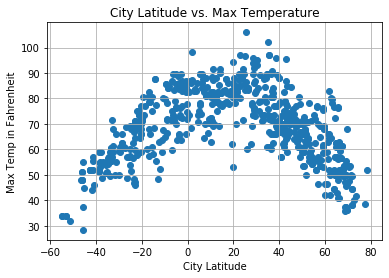

After analyzing the City Latitude vs. Max Temperature plot, as the latitude decreases, the maximum temperature also deceases.
As the latitude increases, the maximum temperature decreases as well.
In conclusion, as cities move away from the equator line, the maximum temperature decreases in relations.


In [21]:
# scatter plot time. 
# Max Temp VS Latitude
plt.scatter(Weather_DF["Latitude"],Weather_DF["Max Temp"])
plt.ylabel("Max Temp in Fahrenheit")
plt.xlabel("City Latitude")
plt.title("City Latitude vs. Max Temperature")
plt.grid()
plt.savefig("../Resources/TempVsLat.png")
plt.show()

print("After analyzing the City Latitude vs. Max Temperature plot, as the latitude decreases, the maximum temperature also deceases.")
print("As the latitude increases, the maximum temperature decreases as well.")
print("In conclusion, as cities move away from the equator line, the maximum temperature decreases in relations.")


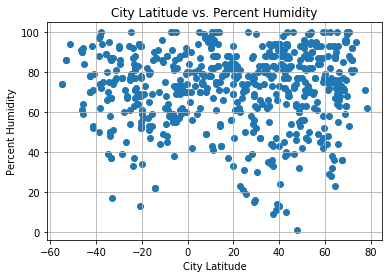

After analyzing the City Latitude vs. Percent Humidity plot, There is no noticable difference in percent humidity based on the latitude.


In [22]:
# Percent Humidity VS Latitude
plt.scatter(Weather_DF["Latitude"],Weather_DF["Humidity"])
plt.ylabel("Percent Humidity")
plt.xlabel("City Latitude")
plt.title("City Latitude vs. Percent Humidity")
plt.grid()
plt.savefig("../Resources/HumidityVsLat.png")
plt.show()
print("After analyzing the City Latitude vs. Percent Humidity plot, There is no noticable difference in percent humidity based on the latitude.")


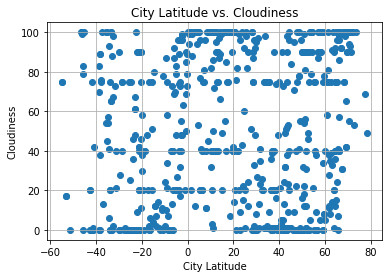

After analyzing the City Latitude vs. Cloudiness plot, There is no noticable difference in cloudiness based on the latitude.


In [23]:
# Cloudiness VS Latitude
plt.scatter(Weather_DF["Latitude"],Weather_DF["Cloudiness"])
plt.ylabel("Cloudiness")
plt.xlabel("City Latitude")
plt.title("City Latitude vs. Cloudiness")
plt.grid()
plt.savefig("../Resources/CloudVsLat.png")
plt.show()
print("After analyzing the City Latitude vs. Cloudiness plot, There is no noticable difference in cloudiness based on the latitude.")


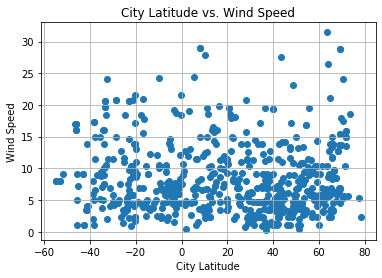

After analyzing the City Latitude vs. Wind Speed plot, There is no noticable difference in Wind Speed based on the latitude.


In [24]:
# Wind Speed VS Latitude
plt.scatter(Weather_DF["Latitude"],Weather_DF["Wind Speed"])
plt.ylabel("Wind Speed")
plt.xlabel("City Latitude")
plt.title("City Latitude vs. Wind Speed")
plt.grid()
plt.savefig("../Resources/WindVsLat.png")
plt.show()
print("After analyzing the City Latitude vs. Wind Speed plot, There is no noticable difference in Wind Speed based on the latitude.")


In [25]:
# we have to run linear regression, but we gotta separate the northern and southern hemisphere. 
north_hemi = Weather_DF.loc[Weather_DF["Latitude"]>=0]
south_hemi = Weather_DF.loc[Weather_DF["Latitude"]<0]

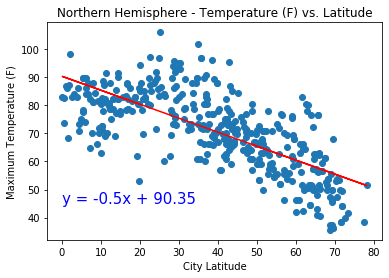

The r-squared value is 0.5167240218639333


In [28]:
# now that we have them divided, we can run the linear regression. 
# Northern Hemisphere - Temperature (F) vs. Latitude

x_values = north_hemi["Latitude"]
y_values = north_hemi["Max Temp"]
#use linregress to get slope and intercept
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = "+ str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(0,45), fontsize= 15, color = "blue")
plt.xlabel("City Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.title("Northern Hemisphere - Temperature (F) vs. Latitude")
plt.show()
print(f"The r-squared value is {rvalue**2}")

#NEED TO DO A SAVEFIG AND ANALYSIS

